In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv("faces.csv")

df.head(5)
print(df.shape)

(279, 129)


In [ ]:
X = np.array(df.drop("target", axis=1))
print(X[1])
print(type(X))


[-1.18411900e+00 -7.70940400e-01 -2.08507600e+00  2.03977470e-01
  9.87932860e-01  2.28960450e-01  1.23535230e-01 -1.00280100e+00
 -4.25578030e-01 -2.10722060e-01 -5.94975300e-01 -1.14724050e+00
  2.12617440e-01 -8.04952400e-01  9.04704200e-01  4.57978790e-01
 -2.12182310e-01 -8.32091700e-01 -9.27008330e-01  6.91706840e-01
  1.30684470e-01  1.66542240e+00 -1.03529560e+00  1.36155070e-01
  1.20741874e-01 -2.92363320e-01 -9.72495300e-01 -7.16196600e-01
  1.18019830e+00  2.19584820e+00  2.66701100e+00 -1.20856230e+00
  1.34147290e+00 -6.52216700e-02  4.20693280e-01 -1.67896330e+00
  2.08564790e-01  3.06731430e-01  4.03317030e-01 -9.75988150e-01
  6.89789000e-03  8.11152600e-01 -9.28292630e-01  6.38097500e-04
 -4.37350930e-01 -1.06061160e+00  6.72215300e-01  4.77415770e-01
 -6.27953800e-01  1.47563430e+00 -8.55448800e-01 -2.78672580e-01
 -7.63644950e-02 -4.14559200e-01 -1.33046130e+00 -4.63007330e-01
  1.36096990e+00 -1.18024600e+00 -3.76618470e-01 -9.44619100e-01
  2.32994400e-01 -6.42566

In [ ]:
y = np.array(df.target)
y.shape

(279,)

## **Misturando tudo**

In [ ]:
from sklearn.utils import shuffle

trainX, trainY = shuffle(X, y, random_state=0)
print(trainY)

['nikoru' 'nikoru' 'nikoru' 'deiski' 'deiski' 'nikoru' 'nikoru' 'nikoru'
 'nikoru' 'deiski' 'nikoru' 'deiski' 'nikoru' 'deiski' 'deiski' 'deiski'
 'deiski' 'nikoru' 'deiski' 'nikoru' 'deiski' 'deiski' 'deiski' 'deiski'
 'deiski' 'deiski' 'nikoru' 'deiski' 'nikoru' 'deiski' 'nikoru' 'deiski'
 'deiski' 'deiski' 'nikoru' 'nikoru' 'nikoru' 'nikoru' 'deiski' 'deiski'
 'nikoru' 'nikoru' 'nikoru' 'nikoru' 'nikoru' 'nikoru' 'nikoru' 'deiski'
 'deiski' 'nikoru' 'nikoru' 'deiski' 'deiski' 'deiski' 'nikoru' 'nikoru'
 'nikoru' 'deiski' 'nikoru' 'nikoru' 'nikoru' 'deiski' 'deiski' 'deiski'
 'nikoru' 'nikoru' 'deiski' 'nikoru' 'nikoru' 'deiski' 'deiski' 'deiski'
 'nikoru' 'nikoru' 'nikoru' 'deiski' 'nikoru' 'deiski' 'nikoru' 'nikoru'
 'nikoru' 'nikoru' 'deiski' 'nikoru' 'nikoru' 'nikoru' 'nikoru' 'deiski'
 'deiski' 'deiski' 'nikoru' 'deiski' 'deiski' 'nikoru' 'deiski' 'nikoru'
 'deiski' 'deiski' 'deiski' 'deiski' 'nikoru' 'nikoru' 'nikoru' 'deiski'
 'deiski' 'deiski' 'nikoru' 'deiski' 'deiski' 'deis

##**TRATAR LABELS**

In [ ]:
from sklearn.preprocessing import LabelEncoder

out_encoder = LabelEncoder()

out_encoder.fit(trainY)
LabelEncoder()


LabelEncoder()

In [ ]:
# discretização (binarização) do rótulo
trainY = out_encoder.transform(trainY)
print(trainY)

[1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1
 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1
 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0
 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1
 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0
 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0
 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1]


## **VALIDATION**

In [ ]:
#carrega faces de validação
df_val = pd.read_csv("faces_validation.csv")
df_val.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,target
0,-0.206436,-0.746464,0.278254,-0.587223,0.025434,0.848655,-0.226615,0.132980,1.182832,-0.282673,0.773295,-0.117908,1.079490,-0.519124,-0.629820,-0.161693,0.195582,-0.199930,0.603669,0.464424,-0.158680,0.212851,-0.532143,1.155205,0.732386,0.665504,0.710068,0.070197,-0.139090,-0.634856,0.454976,0.155202,0.137783,-0.165073,-0.178813,-0.067420,-0.159426,0.487659,0.443822,0.062338,...,-0.086140,-0.670040,-0.563643,-0.072814,0.444570,0.761420,0.296646,-0.332085,0.235130,-0.450460,-0.563659,1.149487,-0.093320,0.589385,-0.573453,-0.646295,0.485657,-0.400344,-0.230257,-0.258993,-1.281964,1.002152,0.097178,0.665930,-0.165873,0.045478,0.354351,-0.487647,0.653829,0.031314,0.743142,0.469287,-0.155531,0.340291,0.506537,0.315118,-0.140103,0.569573,0.195775,deiski
1,-0.130806,-0.575447,0.159703,-0.330744,0.291311,0.709786,-0.105924,0.070527,0.473588,0.160885,0.414585,-0.316870,0.664935,-0.650055,-0.374357,-0.003153,0.108312,0.254863,0.162665,-0.255638,0.101090,0.210526,-0.082747,0.449387,0.472441,0.274098,0.765621,0.332784,-0.602351,0.149052,0.126633,0.613915,-0.078197,-0.028018,0.452732,-0.064221,-0.587907,0.233957,0.123147,0.584642,...,0.312378,-0.063927,0.327874,-0.229674,0.296440,0.710958,0.331260,0.044558,-0.152363,-0.089675,0.034717,0.654028,0.177147,0.252963,-0.506898,-0.402632,0.245751,-1.027006,-0.183330,-0.488793,-1.096510,0.768343,-0.216323,0.238540,0.470417,0.239898,0.525333,-0.383017,0.557899,0.341589,0.498575,-0.007220,-0.178509,0.289650,0.481819,0.023550,-0.335846,0.319536,0.132350,deiski
2,0.080751,-0.162013,-0.268597,-0.055308,1.056408,-1.207288,-0.314635,0.087923,0.858524,-0.991308,0.418723,-0.712151,-0.483829,-0.903477,0.036907,0.960611,0.180463,0.638263,-1.078037,-0.690597,-0.739978,1.905965,-0.992930,0.723715,-0.567212,0.337273,0.026981,0.562894,0.010235,0.231316,-0.045646,0.733602,-0.216198,0.326769,0.482446,0.403070,-0.802598,-0.576467,0.227998,0.460948,...,1.087766,0.762439,0.919384,-0.201308,-0.500199,0.117675,-0.241030,-0.090686,0.240880,-0.730144,-0.457665,-0.290217,0.507112,0.496674,-0.651408,0.181768,0.228390,-0.201277,0.467379,-0.871299,-0.558181,0.858459,1.086597,0.595151,0.465922,1.299041,-0.228225,0.658769,0.193363,-0.037036,0.318306,-0.965409,-0.557025,0.398265,0.250854,-0.136565,-0.160151,-1.028355,0.061811,deiski
3,-0.230243,-0.999213,0.284826,-1.235806,0.183500,0.162685,0.154523,0.596714,1.469765,-0.483936,0.473132,0.027018,-0.035792,-0.519663,-0.183437,-0.081853,-0.362870,0.582098,0.364931,-0.894860,0.221756,0.355561,-0.128156,0.789784,0.680087,0.345221,0.954721,-0.296160,0.194049,0.080085,-0.395161,0.980086,0.057079,0.365536,-0.009111,-0.231252,-0.407675,-0.158127,-0.449051,-0.292848,...,0.466409,-0.166569,-0.011511,-0.523260,0.035937,0.913964,0.689441,-0.926657,0.203140,-0.148813,-0.389825,1.156706,-0.468938,0.581379,-1.306757,-0.096355,0.675187,-0.396087,0.023806,0.342760,-1.080936,0.466083,0.275048,0.347622,0.245121,0.522914,0.147650,-0.047130,0.337729,0.907266,0.938855,0.468463,0.042699,0.446190,-0.086410,0.848373,-0.711378,0.419533,0.379627,deiski
4,0.294907,-0.873148,-0.071881,-1.667662,0.171365,-0.390323,-0.263469,0.333539,0.616051,-0.673439,0.680274,0.484820,-0.680117,-0.661052,0.158783,0.147006,-0.233894,0.321984,0.205010,-1.200472,-0.239211,0.173318,-0.126704,0.573103,0.739806,0.153657,0.595125,0.425735,0.504453,-0.125043,-0.151342,0.768122,-0.085424,-0.000506,-0.060603,-0.087503,-0.510712,0.783086,0.258351,-0.243803,...,0.138759,0.050356,-0.571389,-0.393735,-0.183200,1.119267,0.187382,-0.925499,-0.196728,0.228010,-0.415111,0.480452,-0.118153,0.890241,-0.882063,-0.018629,0.446168,0.209224,0.522467,0.361774,-0.766514,0.606461,0.552802,0.510295,0.067353,0.713876,0.253705,0.111962,1.111428,0.419513,0.254362,0.473169,0.452594,0.819543,

In [ ]:
valX = np.array(df_val.drop("target", axis=1))
valY = np.array(df_val.target)

In [ ]:
out_encoder.fit(valY)
LabelEncoder()

LabelEncoder()

In [ ]:
# discretização (binarização) do rótulo
valY = out_encoder.transform(valY)
print(valY)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## **AVALIAÇÃO ALGORITMOS** 

## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
print(trainX.shape)
print(trainY.shape)

(279, 128)
(279,)


In [ ]:
type(trainX)

numpy.ndarray

In [ ]:
# irá treinar o algoritmo
knn.fit(trainX, trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
yhat_train = knn.predict(trainX)
yhat_val = knn.predict(valX)

In [ ]:
# mostra o resultado da predição
yhat_val

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def print_confusion_matrix(model_name, valY, yhat_val):
      cm = confusion_matrix(valY, yhat_val)
      total = sum(sum(cm))
      acc = (cm[0, 0] + cm[1, 1]) / total
      sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
      specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
      
      print("MODELO: {}".format(model_name))
      print("Acurácia: {:.4f}".format(acc))
      print("Sensitividade: {:.4f}".format(sensitivity)) 
      print("Especificidade: {:.4f}".format(specificity)) 

      from mlxtend.plotting import plot_confusion_matrix
      fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5,5))
      plt.show()


MODELO: KNN
Acurácia: 0.9437
Sensitividade: 0.7143
Especificidade: 1.0000


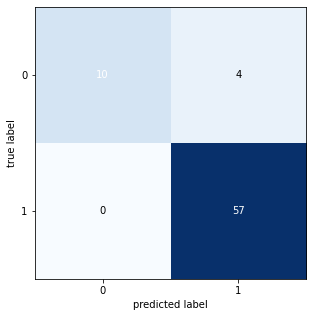

In [ ]:
print_confusion_matrix("KNN", valY, yhat_val)

O modelo é melhor em classificar os positivos, devido a "Especificidade:" ser 1. E perde um pouco em classificar os negativos devdo "Sensitividade" ser 0.71. 

## **SVM (algoritmo de shallow learning)**







In [ ]:
from sklearn import svm

svm = svm.SVC() # instancia o svm

In [ ]:
print(trainX.shape)
print(trainY.shape)

(279, 128)
(279,)


In [ ]:
svm.fit(trainX, trainY)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
yhat_train = svm.predict(trainX)
yhat_val = svm.predict(valX)

MODELO: SVM
Acurácia: 0.9718
Sensitividade: 0.9286
Especificidade: 0.9825


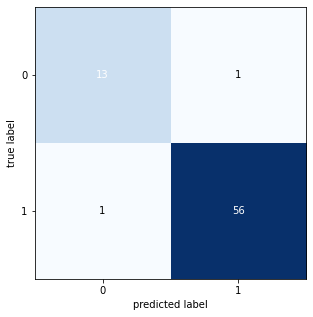

In [ ]:
print_confusion_matrix("SVM", valY, yhat_val)

## **KERAS (multlayer perceptron)**
*multlayer perceptron não é um Deep Learning Completo, ele faz uma parte do DL.







In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
trainY = to_categorical(trainY) #precisa fazer isso para categorizar as classes


In [ ]:
print(trainY)

In [ ]:
valY = to_categorical(valY)

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers


In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(128, )))
model.add(layers.Dropout(0.5)) #diminui overfitting
model.add(layers.Dense(2, activation="softmax")) #camada de saída. Softmax porque está usando categoria

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 8,386
Trainable params: 8,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",
                      loss="categorical_crossentropy",
                      metrics=['accuracy'])

In [ ]:
print(trainX.shape)
print(trainY.shape)
print(type(trainX))
print(type(trainY))

(279, 128)
(279, 2)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
model.fit(trainX, trainY, epochs=100, batch_size=8)

Epoch 1/100
35/35 [==============================] - 1s 2ms/step - loss: 0.5384 - accuracy: 0.7312
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.2333 - accuracy: 0.9068
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1525 - accuracy: 0.9427
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1356 - accuracy: 0.9498
Epoch 5/100
35/35 [==============================] - 0s 1ms/step - loss: 0.1241 - accuracy: 0.9462
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0957 - accuracy: 0.9642
Epoch 7/100
35/35 [==============================] - 0s 1ms/step - loss: 0.0811 - accuracy: 0.9785
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0656 - accuracy: 0.9785
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0507 - accuracy: 0.9821
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0664 - accuracy: 0.9785
Epoch 11/

In [ ]:
yhat_train = model.predict(trainX)
yhat_val = model.predict(valX)

In [ ]:
yhat_val = np.argmax(yhat_val, axis=1)
print(yhat_val) #mostra a previsão

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1]


In [ ]:
valY[0]

array([1, 0])

In [ ]:
# Troca a probabilidade para um resultado. Ou 0 ou 1
valY = np.argmax(valY, axis=1)


In [ ]:
print(valY) #mostra a previsão 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


MODELO: KERAS
Acurácia: 0.9718
Sensitividade: 1.0000
Especificidade: 0.9649


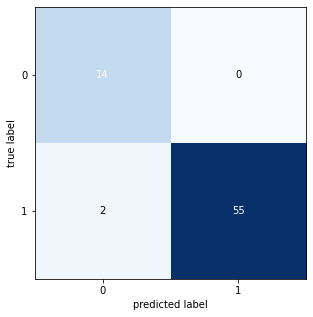

In [ ]:
print_confusion_matrix("KERAS", valY, yhat_val)

 **Apesar da acurácia não ter dado 100%, esse modelo (Keras) é mais generalista. Porque provavelmente o SVM está dando overfitting.**

In [ ]:
model.save('faces.h5') #esse é o modelo que vai reconhecer faces que aparecer no vídeo